In [49]:
import pandas as pd
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

#### Question 1 : Extracting Tesla Stock Data Using yfinance

In [25]:
tesla = yf.Ticker('TSLA')

In [26]:
tesla_data = tesla.history(period='max')
tesla_data.reset_index(inplace = True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


#### Question 2 : Extracting Tesla Revenue Data with Webscraping

In [46]:
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
html_data = requests.get(url).text

In [47]:
soup = BeautifulSoup(html_data, 'html5lib')

In [48]:
tesla_revenue = pd.DataFrame(columns = ['Date','Revenue'])
for table in soup.find_all('table'):
    if ('Tesla Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        for row in rows:
            col = row.find_all('td')
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')

                tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
tesla_revenue.tail()

,Date,Revenue
47,2010-06-30,28
48,2010-03-31,21
49,2009-12-31,
50,2009-09-30,46
51,2009-06-30,27


#### Question 3 : Extracting Gamestop Stock Data using yfinance

In [30]:
gamestop = yf.Ticker('GME')

In [31]:
gamestop_data = gamestop.history(period = 'max')
gamestop_data.reset_index(inplace = True)
gamestop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,6.480515,6.773401,6.413184,6.766667,19054000,0.0,0.0
1,2002-02-14,6.850830,6.864296,6.682505,6.733003,2755400,0.0,0.0
2,2002-02-15,6.733001,6.749833,6.632006,6.699336,2097400,0.0,0.0
3,2002-02-19,6.665671,6.665671,6.312188,6.430016,1852600,0.0,0.0
4,2002-02-20,6.463683,6.648840,6.413185,6.648840,1723200,0.0,0.0


#### Question 4 : Extracting Gamestop Revenue Data with Webscraping

In [38]:
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
html_data = requests.get(url).text

In [39]:
soup = BeautifulSoup(html_data, 'html.parser')

In [42]:
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for table in soup.find_all('table'):

    if ('GameStop Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')

                gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
gme_revenue.tail()

,Date,Revenue
49,2010-01-31,3524
50,2009-10-31,1835
51,2009-07-31,1739
52,2009-04-30,1981
53,2009-01-31,3492


#### Question 5 : Tesla Stock and Revenue Dashboard

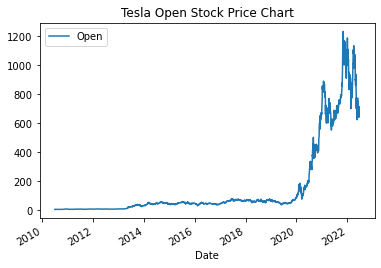

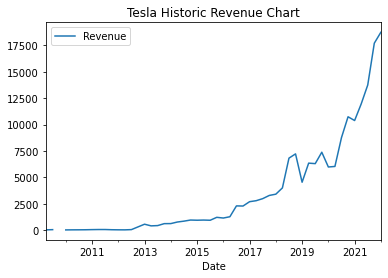

In [52]:
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'])
tesla_data.plot(x = 'Date', y = 'Open', title = 'Tesla Open Stock Price Chart')
tesla_revenue.plot(x = 'Date', y = 'Revenue', title = 'Tesla Historic Revenue Chart')
plt.show()

#### Question 6 : GameStop Stock and Revenue Dashboard

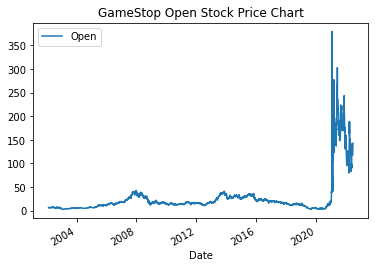

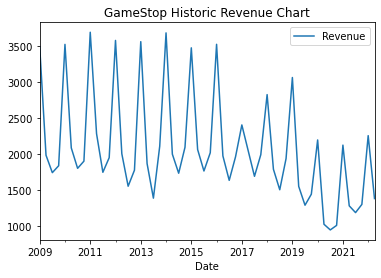

In [50]:
gamestop_revenue['Date'] = pd.to_datetime(gamestop_revenue['Date'])
gamestop_revenue['Revenue'] = pd.to_numeric(gamestop_revenue['Revenue'])
gamestop_data.plot(x = 'Date', y = 'Open', title = 'GameStop Open Stock Price Chart')
gamestop_revenue.plot(x = 'Date', y = 'Revenue', title = 'GameStop Historic Revenue Chart')
plt.show()